In [2]:
import sys
import cv2
import os
import math
import pickle

import matplotlib.pyplot as plt
import numpy as np

In [3]:
file_postfix = '_combined'

In [4]:
max_num_node = 24
canvas_size = 660

flip_bird = [1,3,2,4,5,6,8,7,11,12,9,10,13]
flip_cow = [1,3,2,5,4,6,8,7,9,10,13,14,11,12,17,18,15,16,19]
flip_cat = [1,3,2,5,4,6,7,8,11,12,9,10,15,16,13,14,17]
flip_dog = [1,3,2,5,4,6,7,8,11,12,9,10,15,16,13,14,17,18]
flip_horse = [1,3,2,5,4,6,8,7,9,10,13,14,11,12,17,18,15,16,19,21,20]
flip_person = [1,3,2,5,4,7,6,8,9,10,11,12,16,17,18,13,14,15,22,23,24,19,20,21]
flip_sheep = flip_cow

person_tree = {}
person_tree[0] = [1,2,3,4,7,8,9,10,11]
person_tree[1] = [0,2,3,5,7]
person_tree[2] = [0,1,4,6,7]
person_tree[3] = [0,1]
person_tree[4] = [0,2]
person_tree[5] = [1]
person_tree[6] = [2]
person_tree[7] = [0,1,2,8]
person_tree[8] = [0,7]
person_tree[9] = [0]
person_tree[10] = [0,11,13,16,19,22]
person_tree[11] = [0,10]
person_tree[12] = [13,14]
person_tree[13] = [10,12]
person_tree[14] = [12]
person_tree[15] = [16,17]
person_tree[16] = [10,15]
person_tree[17] = [15]
person_tree[18] = [19,20]
person_tree[19] = [18,10]
person_tree[20] = [18]
person_tree[21] = [22,23]
person_tree[22] = [21,10]
person_tree[23] = [21]

bird_tree = {}
bird_tree[0] = [1,2,3,4,5]
bird_tree[1] = [0,2,3]
bird_tree[2] = [0,1,3]
bird_tree[3] = [0,1,2]
bird_tree[4] = [0,5,6,7,8,10,12]
bird_tree[5] = [0,4]
bird_tree[6] = [7,4]
bird_tree[7] = [6,4]
bird_tree[8] = [4,9]
bird_tree[9] = [8]
bird_tree[10] = [11,4]
bird_tree[11] = [10]
bird_tree[12] = [4] 

dog_tree = {}
dog_tree[0] = [1,2,3,4,5,6,7,17]
dog_tree[1] = [2,0,3]
dog_tree[2] = [0,1,4]
dog_tree[3] = [0,1]
dog_tree[4] = [0,2]
dog_tree[5] = [0,1,2]
dog_tree[6] = [0,8,10,12,14,16,7]
dog_tree[7] = [0,6]
dog_tree[8] = [9,6]
dog_tree[9] = [8]
dog_tree[10] = [6,11]
dog_tree[11] = [10]
dog_tree[12] = [13,6]
dog_tree[13] = [12]
dog_tree[14] = [6,15]
dog_tree[15] = [14]
dog_tree[16] = [6]
dog_tree[17] = [0]

cat_tree = {}
cat_tree[0] = [1,2,3,4,5,6,7]
cat_tree[1] = [2,0,3]
cat_tree[2] = [0,1,4]
cat_tree[3] = [0,1]
cat_tree[4] = [0,2]
cat_tree[5] = [0,1,2]
cat_tree[6] = [0,8,10,12,14,16,7]
cat_tree[7] = [0,6]
cat_tree[8] = [9,6]
cat_tree[9] = [8]
cat_tree[10] = [6,11]
cat_tree[11] = [10]
cat_tree[12] = [13,6]
cat_tree[13] = [12]
cat_tree[14] = [6,15]
cat_tree[15] = [14]
cat_tree[16] = [6]

horse_tree = {}
horse_tree[0] = [1,2,3,4,5,8,9]
horse_tree[1] = [2,0,3]
horse_tree[2] = [0,1,4]
horse_tree[3] = [0,1]
horse_tree[4] = [0,2]
horse_tree[5] = [0,1,2]
horse_tree[6] = [11] #lfho
horse_tree[7] = [13] #rfho
horse_tree[8] = [0,10,12,14,16,18]
horse_tree[9] = [0,8]
horse_tree[10] = [8,11,12]
horse_tree[11] = [10,6]
horse_tree[12] = [10,8,13]
horse_tree[13] = [7]
horse_tree[14] = [8,15,16]
horse_tree[15] = [14,19]
horse_tree[16]= [14,17]
horse_tree[17]= [16,20]
horse_tree[18]= [8]
horse_tree[19] = [15]
horse_tree[20] = [17]

cow_tree = {}
cow_tree[0] = [1,2,3,4,5,6,7,8,9]
cow_tree[1] = [2,0,3,5]
cow_tree[2] = [0,1,4,5]
cow_tree[3] = [0,1,6]
cow_tree[4] = [0,2,7]
cow_tree[5] = [0,1,2]
cow_tree[6] = [0,3] #lfho
cow_tree[7] = [0,4,13] #rfho
cow_tree[8] = [0,9,10,12,14,16,18]
cow_tree[9] = [0,8]
cow_tree[10] = [8,11,12]
cow_tree[11] = [10,6]
cow_tree[12] = [10,8,13]
cow_tree[13] = [7,12]
cow_tree[14] = [8,15,16]
cow_tree[15] = [14]
cow_tree[16]= [8,14,17]
cow_tree[17]= [16]
cow_tree[18]= [8]

motorbike_tree = {}
motorbike_tree[0] = [14,1,2]
motorbike_tree[1] = [14,0]
motorbike_tree[2] = [14,0]
motorbike_tree[3] = [14]
motorbike_tree[4] = [14]
motorbike_tree[5] = [14]
motorbike_tree[6] = [14]
motorbike_tree[7] = [14]
motorbike_tree[8] = [14]
motorbike_tree[9] = [14]
motorbike_tree[10]= [14]
motorbike_tree[11]= [14]
motorbike_tree[12]= [14]
motorbike_tree[13]= [14]
motorbike_tree[14]= [0,1,2,3,4,5,6,7,8,9,10,11,12,13]

bicycle_tree = {}
bicycle_tree[0] = [15,1,3]
bicycle_tree[1] = [15,0,2,4]
bicycle_tree[2] = [15,1]
bicycle_tree[3] = [15,0]
bicycle_tree[4] = [15,1]
bicycle_tree[5] = [15]
bicycle_tree[6] = [15]
bicycle_tree[7] = [15]
bicycle_tree[8] = [15]
bicycle_tree[9] = [15]
bicycle_tree[10]= [15]
bicycle_tree[11]= [15]
bicycle_tree[12]= [15]
bicycle_tree[13]= [15]
bicycle_tree[14]= [15]
bicycle_tree[15]= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

aeroplane_tree = {}
aeroplane_tree[0] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
aeroplane_tree[1] = [0]
aeroplane_tree[2] = [0,3]
aeroplane_tree[3] = [0,2]
aeroplane_tree[4] = [0]
aeroplane_tree[5] = [0]
aeroplane_tree[6] = [0]
aeroplane_tree[7] = [0]
aeroplane_tree[8] = [0]
aeroplane_tree[9] = [0]
aeroplane_tree[10]= [0]
aeroplane_tree[11]= [0]
aeroplane_tree[12]= [0]
aeroplane_tree[13]= [0]
aeroplane_tree[14]= [0]
aeroplane_tree[15]= [0]
aeroplane_tree[16]= [0]
aeroplane_tree[17]= [0]
aeroplane_tree[18]= [0]
aeroplane_tree[19]= [0]
aeroplane_tree[20]= [0]
aeroplane_tree[21]= [0]
aeroplane_tree[22]= [0]

tree = { 'aeroplane':aeroplane_tree, 'motorbike':motorbike_tree,'bicycle':bicycle_tree, 'person':person_tree, 'cow':cow_tree, 'dog':dog_tree, 'cat':cat_tree, 'sheep':cow_tree, 'bird':bird_tree, 'horse':horse_tree }

object_names = ['cow','sheep','bird','person','cat','dog','horse','aeroplane','motorbike','bicycle']

class_dic = {'cow':0,'sheep':1,'bird':2,'person':3,'cat':4,'dog':5,'horse':6,'aeroplane':7,'motorbike':8,'bicycle':9,'car':10}

def get_pos(bbx):
    temp_pos = []
    for i in bbx:
        if i.tolist()!=[0,0,0,0]:
            temp_pos.append([1])
        elif i.tolist()==[0,0,0,0]:
            temp_pos.append([0])
            
    return np.asarray(temp_pos)

#colors = [(229,184,135), (0,0,255), (0,255,0),(255,0,0),(0,255,255),(255,255,0),(255,0,255),(130,0,75),(0,128,128),(128,128,0),(128,128,128),(0,0,0),(30,105,210),(30,105//2,210//2),(180,105,255),(180//2,105//2,255),(100,100,30),(0,100//2,20),(128,0,128),(30,105,210),(255//2,105,255),(180//2,105,255//2),(50,100,0), (229//2,184,135//2),(229,184,135), (0,0,255), (0,255,0),(255,0,0),(0,255,255),(255,255,0),(255,0,255),(130,0,75),(0,128,128),(128,128,0),(128,128,128),(0,0,0),(30,105,210),(30,105//2,210//2),(180,105,255),(180//2,105//2,255),(100,100,30),(0,100//2,20),(128,0,128),(30,105,210),(255//2,105,255),(180//2,105,255//2),(50,100,0), (229//2,184,135//2)]
colors = [(1, 0, 0),
          (0.737, 0.561, 0.561),
          (0.255, 0.412, 0.882),
          (0.545, 0.271, 0.0745),
          (0.98, 0.502, 0.447),
          (0.98, 0.643, 0.376),
          (0.18, 0.545, 0.341),
          (0.502, 0, 0.502),
          (0.627, 0.322, 0.176),
          (0.753, 0.753, 0.753),
          (0.529, 0.808, 0.922),
          (0.416, 0.353, 0.804),
          (0.439, 0.502, 0.565),
          (0.784, 0.302, 0.565),
          (0.867, 0.627, 0.867),
          (0, 1, 0.498),
          (0.275, 0.51, 0.706),
          (0.824, 0.706, 0.549),
          (0, 0.502, 0.502),
          (0.847, 0.749, 0.847),
          (1, 0.388, 0.278),
          (0.251, 0.878, 0.816),
          (0.933, 0.51, 0.933),
          (0.961, 0.871, 0.702)]
colors = (np.asarray(colors)*255)


def arrangement(a, b, object_name):
    if object_name=='cow' or object_name=='sheep':
        p = [ 10,11,18,13,12,14,16,15,17,9,0,7,3,4,5,6,1,2,8 ]
    elif object_name=='bird':
        p = [ 10,11,12,9,0,7,3,4,5,6,1,2,8 ]
    elif object_name=='person':
        p = [ 10,11,19,18,20,22,21,23,13,12,14,16,15,17,9,0,7,3,4,5,6,1,2,8 ]
    elif object_name=='cat':
        p = [ 10,11,13,12,14,16,15,9,0,7,3,4,5,6,1,2,8]
    elif object_name=='dog':
        p = [ 10,11,13,12,14,16,15,17,9,0,7,3,4,5,6,1,2,8]
    elif object_name=='horse':
        p = [ 10,11,19,18,20,13,12,14,16,15,17,9,0,7,3,4,5,6,1,2,8 ]
    elif object_name=='aeroplane':
        p = [ 10,11,19,18,20,22,21,13,12,14,16,15,17,9,0,7,3,4,5,6,1,2,8 ]
    elif object_name=='car':
        p = [ 10,11,19,18,20,22,21,23,24,25,26,27,28,13,12,14,16,15,17,9,0,7,3,4,5,6,1,2,8 ]
    elif object_name=='motorbike':
        p = [ 10,11,13,12,14,9,0,7,3,4,5,6,1,2,8 ]
    elif object_name=='bicycle':
        p = [ 10,11,13,12,14,15,9,0,7,3,4,5,6,1,2,8 ]
    else:
      print("error")
    return a[p], b[p]

def rearrange(lbl, bbx, mask, object_name):
    if object_name=='cow' or object_name=='sheep':
        p = np.asarray([1,3,2,5,4,6,8,7,9,10,13,14,11,12,17,18,15,16,19])-1
    elif object_name=='bird':
        p = np.asarray([1,3,2,4,5,6,8,7,11,12,9,10,13])-1
    elif object_name=='person':
        p = np.asarray([1,3,2,5,4,7,6,8,9,10,11,12,16,17,18,13,14,15,22,23,24,19,20,21])-1
    elif object_name=='cat':
        p = np.asarray([1,3,2,5,4,6,7,8,11,12,9,10,15,16,13,14,17])-1
    elif object_name=='dog':
        p = np.asarray([1,3,2,5,4,6,7,8,11,12,9,10,15,16,13,14,17,18])-1
    elif object_name=='horse':
        p = np.asarray([1,3,2,5,4,6,8,7,9,10,13,14,11,12,17,18,15,16,19,21,20])-1
    elif object_name=='aeroplane':
        p = np.asarray([1,3,2,5,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])-1
    elif object_name=='car':
        p = np.asarray([1,3,2,4,5,7,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29])-1
    elif object_name=='motorbike':
        p = np.asarray([1,3,2,4,5,7,6,8,9,10,11,12,13,14,15])-1
    elif object_name=='bicycle':
        p = np.asarray([1,3,2,4,5,7,6,8,9,10,11,12,13,14,15,16])-1
    else:
      print("error")    
    return lbl[p], bbx[p], mask[p]

def pad_along_axis(array, target_length, axis=0):
    pad_size = target_length - array.shape[axis]
    axis_nb = len(array.shape)
    if pad_size < 0:
        return array

    npad = [(0, 0) for x in range(axis_nb)]
    npad[axis] = (0, pad_size)

    b = np.pad(array, pad_width=npad, mode='constant', constant_values=0)

    return b

def bounder(img):
    result = np.where(img<0.5)
    listOfCoordinates = list(zip(result[0], result[1]))
    for cord in listOfCoordinates:
        img[cord] = 0
    result1 = np.where(img>=0.5)
    listOfCoordinates1 = list(zip(result1[0], result1[1]))
    for cord in listOfCoordinates1:
        img[cord] = 1
    return img

def add_images(canvas,img, ii):
    result = np.where(img!=0)
    listOfCoordinates = list(zip(result[0], result[1]))
    for cord in listOfCoordinates:
        canvas[cord] = ii
    return canvas

label_to_color = {0:(0,0,0),
                    1:(0.941, 0.973, 1),
                    2:(0.98, 0.922, 0.843),
                    3:(0, 1, 1),
                    4:(0.498, 1, 0.831),
                    5:(0.941, 1, 1),
                    6:(0.961, 0.961, 0.863),
                    7:(1, 0.894, 0.769),
                    8:(0.251, 0.878, 0.816),
                    9:(1, 0.388, 0.278),
                    10:(0, 0, 1),
                    11:(0.541, 0.169, 0.886),
                    12:(0.647, 0.165, 0.165),
                    13:(0.871, 0.722, 0.529),
                    14:(0.373, 0.62, 0.627),
                    15:(0.498, 1, 0),
                    16:(0.824, 0.412, 0.118),
                    17:(1, 0.498, 0.314),
                    18:(0.392, 0.584, 0.929),
                    19:(0.275, 0.51, 0.706),
                    20:(0.863, 0.0784, 0.235),
                    21:(0, 1, 1),
                    22:(0, 0, 0.545),
                    23:(0.824, 0.706, 0.549),
                    24:(0.251, 0.878, 0.816)}

def label_2_image(img):
    rgb_img = np.zeros((img.shape[0],img.shape[1], 3)) 
    for key in label_to_color.keys():
        rgb_img[img == key] = label_to_color[key]
    return rgb_img

def make_mask(box,mask):    
    b_in = np.copy(box)
    mx = np.copy(mask)
    max_parts = len(box)
    xmax = max(box[:,2])
    ymax = max(box[:,3])
    canvas = np.zeros((int(ymax),  int(xmax)), np.float32)
    b_in, mx = arrangement(b_in, mx,object_name)
    for i in range(max_parts): 
        x_min, y_min, x_max, y_max = b_in[i]
        if x_max-x_min > 0 and y_max-y_min>0:
            x, y = canvas[ int(y_min):int(y_max), int(x_min):int(x_max) ].shape
            canvas[ int(y_min):int(y_max), int(x_min):int(x_max) ] = add_images(canvas[ int(y_min):int(y_max), int(x_min):int(x_max)  ],cv2.resize(bounder(np.squeeze(mx[i]))*(i+1), (y,x)), i+1)
    plt.imshow(label_2_image(canvas))
    plt.show()
    return label_2_image(canvas)
    
def plot_image_bbx(bbx,image):
    canvas = np.copy(image)
    i = 0
    for coord in bbx:
        x_minp, y_minp,x_maxp , y_maxp= coord
        if [x_minp, y_minp,x_maxp , y_maxp]!=[0,0,0,0]:
            cv2.rectangle(canvas, ((x_minp), (y_minp)), ((x_maxp) , (y_maxp) ), colors[i], 4)
        i = i+1
    plt.imshow(canvas)
    plt.show()
    return canvas

def flip_mask(mask):
    mx = np.fliplr(mask)
    return mx

def flip_bbx(label, bbx):
    bx = np.copy(bbx)
    x_min = min(bbx[:,0])
    y_min = min(bbx[:,1])
    x_max = max(bbx[:,2])
    y_max = max(bbx[:,3])
    img_center = np.asarray( [((x_max+x_min)/2),  ((y_max+y_min)/2)] )
    img_center = np.hstack( (img_center, img_center) )
    bx[:,[0,2]] += 2*(img_center[[0,2]] - bx[:,[0,2]])
    box_w = abs(bx[:,0] - bx[:,2])
    bx[:,0] -= box_w
    bx[:,2] += box_w
    for i in range(len(label)):
        if sum(label[i])==0:
            bx[i][0] = 0
            bx[i][1] = 0
            bx[i][2] = 0
            bx[i][3] = 0
    return bx

def flip_data_instance(label, box, mask):
    bx = np.copy(flip_bbx(label,box))
    mx = np.fliplr(mask)
    #ix = np.copy(image[:,::-1])
    lx = np.copy(label)
    lx, bx, mx = rearrange(lx, bx, mx,object_name)
    return lx,bx,mx
def cordinates(img):    
    y_min = 0
    y_max = 0
    x_min = 0
    x_max = 0

    for i in img:
        if np.count_nonzero(i)!=0:
            break
        y_min+=1
        
    for i in img.T:
        if np.count_nonzero(i)!=0:
            break
        x_min+=1
    
    for i in img[::-1]:
        if np.count_nonzero(i)!= 0:
            break
        y_max+=1
    y_max = img.shape[0] - y_max - 1
    
    for i in img.T[::-1]:
        if np.count_nonzero(i) != 0:
            break
        x_max+=1
    x_max = img.shape[1] - x_max - 1

    return x_min, y_min, x_max, y_max

def rotate_im(image, angle):
    # grab the dimensions of the image and then determine the
    # centre
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)

    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])

    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))

    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY

    # perform the actual rotation and return the image
    image = cv2.warpAffine(image, M, (nW, nH))

#    image = cv2.resize(image, (w,h))
    return image

def get_corners(bboxes):
    
    width = (bboxes[:,2] - bboxes[:,0]).reshape(-1,1)
    height = (bboxes[:,3] - bboxes[:,1]).reshape(-1,1)
    
    x1 = bboxes[:,0].reshape(-1,1)
    y1 = bboxes[:,1].reshape(-1,1)
    
    x2 = x1 + width
    y2 = y1 
    
    x3 = x1
    y3 = y1 + height
    
    x4 = bboxes[:,2].reshape(-1,1)
    y4 = bboxes[:,3].reshape(-1,1)
    
    corners = np.hstack((x1,y1,x2,y2,x3,y3,x4,y4))
    
    return corners

def clip_box(bbox, clip_box, alpha):
    ar_ = (bbox_area(bbox))
    x_min = np.maximum(bbox[:,0], clip_box[0]).reshape(-1,1)
    y_min = np.maximum(bbox[:,1], clip_box[1]).reshape(-1,1)
    x_max = np.minimum(bbox[:,2], clip_box[2]).reshape(-1,1)
    y_max = np.minimum(bbox[:,3], clip_box[3]).reshape(-1,1)
    
    bbox = np.hstack((x_min, y_min, x_max, y_max, bbox[:,4:]))
    
    delta_area = ((ar_ - bbox_area(bbox))/ar_)
    
    mask = (delta_area < (1 - alpha)).astype(int)
    
    bbox = bbox[mask == 1,:]


    return bbox

def rotate_box(corners,angle,  cx, cy, h, w):

    corners = corners.reshape(-1,2)
    corners = np.hstack((corners, np.ones((corners.shape[0],1), dtype = type(corners[0][0]))))
    
    M = cv2.getRotationMatrix2D((cx, cy), angle, 1.0)
    
    
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cx
    M[1, 2] += (nH / 2) - cy
    # Prepare the vector to be transformed
    calculated = np.dot(M,corners.T).T
    
    calculated = calculated.reshape(-1,8)
    
    return calculated

def get_enclosing_box(corners):
    x_ = corners[:,[0,2,4,6]]
    y_ = corners[:,[1,3,5,7]]
    
    xmin = np.min(x_,1).reshape(-1,1)
    ymin = np.min(y_,1).reshape(-1,1)
    xmax = np.max(x_,1).reshape(-1,1)
    ymax = np.max(y_,1).reshape(-1,1)
    
    final = np.hstack((xmin, ymin, xmax, ymax,corners[:,8:]))
    
    return final

def bbox_area(bbox):
    return (bbox[:,2] - bbox[:,0])*(bbox[:,3] - bbox[:,1])

def rtt(angle, label, img, bboxes):

    w,h = img.shape[1], img.shape[0]
    cx, cy = w//2, h//2

    img = rotate_im(img, angle)

    corners = get_corners(bboxes)

    corners = np.hstack((corners, bboxes[:,4:]))


    corners[:,:8] = rotate_box(corners[:,:8], angle, cx, cy, h, w)

    new_bbox = get_enclosing_box(corners)


    scale_factor_x = img.shape[1] / w

    scale_factor_y = img.shape[0] / h

    img = cv2.resize(img, (w,h))
    
    new_bbox[:,:4] = np.true_divide(new_bbox[:,:4], [scale_factor_x, scale_factor_y, scale_factor_x, scale_factor_y]) 

    for i in range(len(label)):
        if sum(label[i])==0:
            new_bbox[i][0] = 0
            new_bbox[i][1] = 0
            new_bbox[i][2] = 0
            new_bbox[i][3] = 0
    
    return img, new_bbox
def render_mask(box,mask,angle):
    mx = np.copy(mask)
    b_in = np.copy(box)
    max_parts = len(box)
    xmax = max(box[:,2])
    ymax = max(box[:,3])
    temp_mx_list = []
    temp_bx_list = []
    for i in range(max_parts):
        canvas = np.zeros((int(ymax),  int(xmax)), np.float32)
        x_min, y_min, x_max, y_max = b_in[i]
        if x_max-x_min > 0 and y_max-y_min>0:
            
            x, y = canvas[ int(y_min):int(y_max), int(x_min):int(x_max) ].shape
            canvas[ int(y_min):int(y_max), int(x_min):int(x_max) ] = add_images(canvas[ int(y_min):int(y_max), int(x_min):int(x_max)  ],cv2.resize(bounder(np.squeeze(mx[i]))*(i+1), (y,x)), i+1)
            canvas = rotate_im(canvas,angle)
            x_min, y_min, x_max, y_max = cordinates(canvas)
            #canvas = canvas[int(y_min):int(y_max), int(x_min):int(x_max)]
            #resized_cropped = np.expand_dims(cv2.resize(canvas, (64, 64)), axis = 3)
        temp_bx_list.append([x_min, y_min, x_max, y_max])
        #temp_mx_list.append(resized_cropped)
        #plt.imshow(canvas)
        #plt.show()
    return np.asarray(temp_bx_list,dtype="float32")

def centre_object(bbx,canvas_size):
    
    pos = get_pos(bbx)
    bx = np.copy(bbx)
    
    h,w = canvas_size
    
    h_o = max(bbx[pos[:, 0]==1, 3]) + min(bbx[pos[:, 0]==1, 1])
    w_o = max(bbx[pos[:, 0]==1, 2]) + min(bbx[pos[:, 0]==1, 0])
    
    h_shift = int(h/2 - h_o/2)
    w_shift = int(w/2 - w_o/2)
    
    bx[:,0] = (bx[:,0]+w_shift)
    bx[:,1] = (bx[:,1]+h_shift)
    bx[:,2] = (bx[:,2]+w_shift)
    bx[:,3] = (bx[:,3]+h_shift)

    return bx*pos

def centre_object_old(bbx,canvas_size):
    
    pos = get_pos(bbx)
    bx = np.copy(bbx)
    
    h,w = canvas_size
    
    h_o = max(bbx[:, 3]) + min(bbx[:, 1])
    w_o = max(bbx[:, 2]) + min(bbx[:, 0])
    
    h_shift = int(h/2 - h_o/2)
    w_shift = int(w/2 - w_o/2)
    
    bx[:,0] = (bx[:,0]+w_shift)
    bx[:,1] = (bx[:,1]+h_shift)
    bx[:,2] = (bx[:,2]+w_shift)
    bx[:,3] = (bx[:,3]+h_shift)

    return bx*pos

def scale(bbx, scaling_factor):
    
    height = max(bbx[:,3])
    width = max(bbx[:,2])
    
    pos = get_pos(bbx)
    
    fold_a = np.copy(bbx)
    fold_b = np.copy(bbx)
    fold_c = np.copy(bbx)
    fold_d = np.copy(bbx)
    
    center_shift_pos = canvas_size*(scaling_factor)
    center_shift_neg = canvas_size*(-scaling_factor)
    
    fold_a = fold_a*(1-scaling_factor) + center_shift_pos
    fold_a = centre_object(fold_a*pos, (canvas_size, canvas_size))
    fold_b = fold_b*(1+scaling_factor) + center_shift_neg
    fold_b = centre_object(fold_b*pos, (canvas_size, canvas_size))
    
    
    center_shift_pos = canvas_size*(scaling_factor*0.5)
    center_shift_neg = canvas_size*(-scaling_factor*0.5)
    
    fold_c = fold_c*(1-scaling_factor*0.5) + center_shift_pos
    fold_c = centre_object(fold_c*pos, (canvas_size, canvas_size))
    fold_d = fold_d*(1+scaling_factor*0.5) + center_shift_neg
    fold_d = centre_object(fold_d*pos, (canvas_size, canvas_size))
     
    return fold_a*pos,fold_b*pos,fold_c*pos,fold_d*pos

def scale_old(bbx, scaling_factor):
    
    height = max(bbx[:,3])
    width = max(bbx[:,2])
    
    pos = get_pos(bbx)
    
    fold_a = np.copy(bbx)
    fold_b = np.copy(bbx)
    fold_c = np.copy(bbx)
    fold_d = np.copy(bbx)
    
    scale_height = scaling_factor
    scale_width = scaling_factor
    
    fold_a[:,0] = (fold_a[:,0]-scale_width)
    fold_b[:,1] = (fold_b[:,1]-scale_height)
    fold_c[:,2] = (fold_c[:,2]+scale_width)
    fold_d[:,3] = (fold_d[:,3]+scale_height)
    
    return fold_a*pos,fold_b*pos,fold_c*pos,fold_d*pos

def append_labels(box):
  all_box = []
  for bbx in box:
    pos = get_pos(bbx)
    bbx = (((bbx/canvas_size)))*pos
    #calculate (x_c,y_c, w,h)
    #eps = 0.00001
    #bbx[:,2] = bbx[:,2] + eps
    #bbx[:,3] = bbx[:,3] + eps
    #bxx = np.copy(bbx)
    ##bxx[:,0] = (bbx[:,2] + bbx[:,0])/2
    ##bxx[:,1] = (bbx[:,3] + bbx[:,1])/2
    #bxx[:,0] =  np.log(bbx[:,0])
    #bxx[:,1] =  np.log(bbx[:,1])
    #bxx[:,2] = (np.log(abs(bbx[:,3] - bbx[:,1])))
    #bxx[:,3] = (np.log(abs(bbx[:,2] - bbx[:,0])))
    #bbx = bxx*pos
    #bbx[np.isnan(bbx)] = 0

    temp = []
    for bx in bbx:
      if bx.tolist()!=[0,0,0,0]:
        temp.append([1]+bx.tolist())
      else:
        temp.append([0]+bx.tolist())
    all_box.append(temp)
  return np.asarray(all_box)

def plot_bbx(bbx):
    bbx = bbx*canvas_size
    canvas = np.ones((canvas_size,canvas_size,3), np.uint8) * 255
    for i, coord in enumerate(bbx):
        x_minp, y_minp,x_maxp , y_maxp= coord
        if [x_minp, y_minp,x_maxp , y_maxp]!=[0,0,0,0]:
            cv2.rectangle(canvas, (int(x_minp), int(y_minp)), (int(x_maxp) , int(y_maxp) ), colors[i], 6)
    return canvas

def transform_bbx(bbx1):
    
    eps = 0.00001
    bbx = np.copy(bbx1)
    bxx = np.copy(bbx)

    bbx[:,0] = np.exp(bbx[:,0])
    bbx[:,1] = np.exp(bbx[:,1])
    bbx[:,2] = np.exp(bbx[:,2])
    bbx[:,3] = np.exp(bbx[:,3])
    
    bxx[:,0] = bbx[:,0]
    bxx[:,1] = bbx[:,1]
    bxx[:,2] = bbx[:,0] + (bbx[:,3]) 
    bxx[:,3] = bbx[:,1] + (bbx[:,2]) 
    
    return bxx


In [5]:
#part labels
bird_labels = {'head':1, 'leye':2, 'reye':3, 'beak':4, 'torso':5, 'neck':6, 'lwing':7, 'rwing':8, 'lleg':9, 'lfoot':10, 'rleg':11, 'rfoot':12, 'tail':13}

cat_labels = {'head':1, 'leye':2, 'reye':3, 'lear':4, 'rear':5, 'nose':6, 'torso':7, 'neck':8, 'lfleg':9, 'lfpa':10, 'rfleg':11, 'rfpa':12, 'lbleg':13, 'lbpa':14, 'rbleg':15, 'rbpa':16, 'tail':17}

cow_labels = {'head':1, 'leye':2, 'reye':3, 'lear':4, 'rear':5, 'muzzle':6, 'lhorn':7, 'rhorn':8, 'torso':9, 'neck':10, 'lfuleg':11, 'lflleg':12, 'rfuleg':13, 'rflleg':14, 'lbuleg':15, 'lblleg':16, 'rbuleg':17, 'rblleg':18, 'tail':19}

dog_labels = {'head':1, 'leye':2, 'reye':3, 'lear':4, 'rear':5, 'nose':6, 'torso':7, 'neck':8, 'lfleg':9, 'lfpa':10, 'rfleg':11, 'rfpa':12, 'lbleg':13, 'lbpa':14, 'rbleg':15, 'rbpa':16, 'tail':17, 'muzzle':18}

horse_labels = {'head':1, 'leye':2, 'reye':3, 'lear':4, 'rear':5, 'muzzle':6, 'lfho':7, 'rfho':8, 'torso':9, 'neck':10, 'lfuleg':11, 'lflleg':12, 'rfuleg':13, 'rflleg':14, 'lbuleg':15, 'lblleg':16, 'rbuleg':17, 'rblleg':18, 'tail':19, 'lbho':20, 'rbho':21}

sheep_labels = cow_labels

person_labels = {'head':1, 'leye':2,  'reye':3, 'lear':4, 'rear':5, 'lebrow':6, 'rebrow':7,  'nose':8,  'mouth':9,  'hair':10, 'torso':11, 'neck': 12, 'llarm': 13, 'luarm': 14, 'lhand': 15, 'rlarm':16, 'ruarm':17, 'rhand': 18, 'llleg': 19, 'luleg':20, 'lfoot':21, 'rlleg':22, 'ruleg':23, 'rfoot':24}


In [6]:
bird_comb = {
    1 : [1, 2, 3, 4],
    5 : [5],
    6 : [6],
    7 : [7],
    8 : [8],
    9 : [9],
    10 : [10],
    11 : [11],
    12 : [12],
    13 : [13]
}

cat_comb = {
    1 : [1, 2, 3, 4, 5, 6],
    7 : [7],
    8 : [8],
    9 : [9],
    10 : [10],
    11 : [11],
    12 : [12],
    13 : [13],
    14 : [14],
    15 : [15],
    16 : [16],
    17 : [17]
}
cow_comb = {
    1 : [1, 2, 3, 4, 5, 6],
    7 : [7],
    8 : [8],
    9 : [9],
    10 : [10],
    11 : [11],
    12 : [12],
    13 : [13],
    14 : [14],
    15 : [15],
    16 : [16],
    17 : [17],
    18 : [18],
    19 : [19]
}
dog_comb = {
    1 : [1, 2, 3, 4, 5, 6],
    7 : [7],
    8 : [8],
    9 : [9],
    10 : [10],
    11 : [11],
    12 : [12],
    13 : [13],
    14 : [14],
    15 : [15],
    16 : [16],
    17 : [17],
    18 : [18]
}
horse_comb = {
    1 : [1, 2, 3, 4, 5, 6],
    7 : [7],
    8 : [8],
    9 : [9],
    10 : [10],
    11 : [11],
    12 : [12],
    13 : [13],
    14 : [14],
    15 : [15],
    16 : [16],
    17 : [17],
    18 : [18],
    19 : [19],
    20 : [20],
    21 : [21]
}
sheep_comb = {
    1 : [1, 2, 3, 4, 5, 6],
    7 : [7],
    8 : [8],
    9 : [9],
    10 : [10],
    11 : [11],
    12 : [12],
    13 : [13],
    14 : [14],
    15 : [15],
    16 : [16],
    17 : [17],
    18 : [18],
    19 : [19]
}
person_comb = {
    1 : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    11 : [11],
    12 : [12],
    13 : [13],
    14 : [14],
    15 : [15],
    16 : [16],
    17 : [17],
    18 : [18],
    19 : [19],
    20 : [20],
    21 : [21],
    22 : [22],
    23 : [23],
    24 : [24],
}

class_comb_dict = {
    'bird' : bird_comb,
    'cat' : cat_comb,
    'cow' : cow_comb,
    'dog' : dog_comb,
    'horse' : horse_comb,
    'sheep' : sheep_comb,
    'person' : person_comb
}



In [7]:
new_mapping = {}
num_parts = 0
for object_name in object_names:
    if object_name in class_comb_dict.keys():
        obj_map = class_comb_dict[object_name]
        temp_mapping = list(obj_map.keys())
        temp_mapping.sort()
        new_mapping[object_name] = temp_mapping
        num_parts = max(num_parts, len(temp_mapping))
            
print(new_mapping)
print(num_parts)
    
            

{'cow': [1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'sheep': [1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'bird': [1, 5, 6, 7, 8, 9, 10, 11, 12, 13], 'person': [1, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'cat': [1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 'dog': [1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], 'horse': [1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]}
16


In [8]:
def combine_parts(boxes, object_name): 
    combinations = class_comb_dict[object_name]
    label_val = np.where(np.sum(boxes, axis=-1)>0, 1, 0)
    present_parts = np.where(label_val==1)[0]
    boxes = boxes.copy()
    for key, val in combinations.items():
        combine_parts = np.intersect1d(np.array(val)-1,present_parts)
        new_box = boxes[combine_parts]
        boxes[combine_parts] = 0
        if len(new_box)>0:
            box_max = np.max(new_box, axis=0)
            box_min = np.min(new_box, axis=0)
            new_box = np.array([box_min[0],box_min[1],box_max[2],box_max[3]])
            boxes[key-1, :] = new_box
    return boxes
        

In [9]:
def plot_all_boxes(images):
    plots = len(images)
    figure = plt.figure(figsize=(20, 10))
    for i, img in enumerate(images):
        plt.subplot(int(np.ceil(plots/5)), 5, i+1)
        plt.xlim(0, canvas_size)
        plt.ylim(0, canvas_size)
        for box in img:
            x_min, y_min, x_max, y_max = box
            plt.plot([x_min, x_max, x_max, x_min, x_min],
                     [y_min, y_min, y_max, y_max, y_min]
                    )
    plt.show()
            

In [10]:
object_names = ['bird', 'cat', 'cow', 'dog', 'horse', 'sheep', 'person']

In [11]:
class_v = {}
X_train = {}
adj_train = {}
path = "C:/GitHub/meronymnet/Dataset/input_data/"

for object_name in object_names:
    print(object_name)
#     with open(path+object_name+'_images', 'rb') as f:
#       o_images = pickle.load(f)
    with open(path+object_name+'_part_separated_labels', 'rb') as f:
      o_labels = pickle.load(f)
    with open(path+object_name+'_part_separated_masks', 'rb') as f:
      o_masks = pickle.load(f)
    with open(path+object_name+'_part_separated_bbx', 'rb') as f:
      o_bbx = pickle.load(f)

    train_set_limit = int(len(o_bbx)*(75/100))
    validation_set_limit = int(len(o_bbx)*(10/100))
    test_set_limit = int(len(o_bbx)*(15/100))

    label = o_labels[:train_set_limit]
    box = o_bbx[:train_set_limit]
    mask = o_masks[:train_set_limit]
    #image = o_images[0:train_set_limit]

    label_val = o_labels[train_set_limit:train_set_limit+validation_set_limit]
    box_val = o_bbx[train_set_limit:train_set_limit+validation_set_limit]
    mask_val = o_masks[train_set_limit:train_set_limit+validation_set_limit]
    #image_val = o_images[train_set_limit:train_set_limit+validation_set_limit]

    label_test = o_labels[train_set_limit+validation_set_limit::]
    box_test = o_bbx[train_set_limit+validation_set_limit::]
    mask_test = o_masks[train_set_limit+validation_set_limit::]
    #image_test = o_images[train_set_limit+validation_set_limit::]

    max_parts = len(label[0])

    flipped_label = []
    flipped_box = []
    flipped_mask = []
    flipped_image = []

    angle = 5

    for l,b,m in zip(label,  box, mask):
        ll, bb, mm = flip_data_instance(l,b,m)
        flipped_label.append(ll)
        flipped_box.append(bb)
        flipped_mask.append(mm)
        #flipped_image.append(ii)

    flipped_label = np.asarray(flipped_label)
    flipped_box =   np.asarray(flipped_box )
    flipped_mask =  np.asarray(flipped_mask)
    #flipped_image = np.asarray(flipped_image)

    label = np.concatenate((label, flipped_label), axis = 0)
    box = np.concatenate((box, flipped_box), axis = 0)
    mask = np.concatenate((mask, flipped_mask), axis = 0)
    #image = np.concatenate((image, flipped_image), axis = 0)

    rt_box = []
    for bx, mx in zip(box, mask):
      bbxx1 = render_mask(bx,mx,angle)
      bbxx2 = render_mask(bx,mx,-angle)
      rt_box.append(bbxx1)
      rt_box.append(bbxx2)

    rt_box = np.asarray(rt_box)
    box = box = np.concatenate((box, rt_box), axis = 0)   

    centre_box = []
    for bx in box:
      centre_box.append(centre_object(bx, (canvas_size,canvas_size)))

    centre_box = np.asarray(centre_box)
    box = centre_box
    scale_box = []
    for bx in box:
      a,b,c,d = scale(bx, 0.05)
      scale_box.append(a)
      scale_box.append(b)
      scale_box.append(c)
      scale_box.append(d)

    scale_box = np.asarray(scale_box)
    box = np.concatenate((box, scale_box), axis = 0)
    
    #combine_parts
    combined_boxes = []
    for b in box:
        combined_boxes.append(combine_parts(b, object_name))
    box = combined_boxes
    
    box = append_labels(box)
    box = pad_along_axis(box, 24, axis=1)
    
    
    final_input = []
    for i,x in enumerate(box):
      l = 24
      temp = np.zeros((l,l), dtype=np.float32)
      for j in range(l):
        temp[j][j] = 1
        if x[j][0] == 1:
          for y in tree[object_name][j]:
            if x[y][0] == 1:
              temp[j][y] = 1
              temp[y][j] = 1
      final_input.append(temp[np.array(new_mapping[object_name])-1][:,np.array(new_mapping[object_name])-1])
    box = pad_along_axis(box[:, np.array(new_mapping[object_name])-1], num_parts, axis=1)
    adj = np.asarray(final_input)
    adj_shape = adj.shape
    adj = np.pad(adj, 
                 [(0, 0), (0, num_parts-adj_shape[1]), (0, num_parts-adj_shape[1])],
                 mode = 'constant',
                 constant_values=0)
    class_v[object_name] = (np.asarray([np.eye(7)[class_dic[object_name]]]*len(box)))
    X_train[object_name] = (box)
    adj_train[object_name] = (adj)


cclass_v = np.concatenate(
list(class_v.values()), axis = 0)


cadj_train = np.concatenate(
list(adj_train.values()), axis = 0)


cX_train = np.concatenate(
list(X_train.values()), axis = 0)


X_train = cX_train
class_v = cclass_v
adj_train = cadj_train

bird
cat
cow
dog
horse
sheep
person


In [12]:
class_v_val = {}
X_train_val = {}
adj_train_val = {}
path = "C:/GitHub/meronymnet/Dataset/input_data/"
for object_name in object_names:
    print(object_name)
    with open(path+object_name+'_part_separated_labels', 'rb') as f:
      o_labels = pickle.load(f)
    with open(path+object_name+'_part_separated_masks', 'rb') as f:
      o_masks = pickle.load(f)
    with open(path+object_name+'_part_separated_bbx', 'rb') as f:
      o_bbx = pickle.load(f)

    train_set_limit = int(len(o_bbx)*(75/100))
    validation_set_limit = int(len(o_bbx)*(10/100))
    test_set_limit = int(len(o_bbx)*(15/100))

    #label = o_labels[0:train_set_limit]
    #box = o_bbx[0:train_set_limit]
    #mask = o_masks[0:train_set_limit]
    #image = o_images[0:train_set_limit]
    
    label = o_labels[train_set_limit:train_set_limit+validation_set_limit]
    box = o_bbx[train_set_limit:train_set_limit+validation_set_limit]
    mask = o_masks[train_set_limit:train_set_limit+validation_set_limit]
    #image = o_images[train_set_limit:train_set_limit+validation_set_limit]
    #label_test = o_labels[train_set_limit+validation_set_limit::]
    #box_test = o_bbx[train_set_limit+validation_set_limit::]
    #mask_test = o_masks[train_set_limit+validation_set_limit::]
    #image_test = o_images[train_set_limit+validation_set_limit::]

    max_parts = len(label[0])

    flipped_label = []
    flipped_box = []
    flipped_mask = []
    #flipped_image = []

    angle = 5

    for l,b,m in zip(label,  box, mask):
        ll, bb, mm = flip_data_instance(l,b,m)
        flipped_label.append(ll)
        flipped_box.append(bb)
        flipped_mask.append(mm)
        

    flipped_label = np.asarray(flipped_label)
    flipped_box =   np.asarray(flipped_box )
    flipped_mask =  np.asarray(flipped_mask)
    #flipped_image = np.asarray(flipped_image)

    label = np.concatenate((label, flipped_label), axis = 0)
    box = np.concatenate((box, flipped_box), axis = 0)
    mask = np.concatenate((mask, flipped_mask), axis = 0)
    #image = np.concatenate((image, flipped_image), axis = 0)

    rt_box = []
    for bx, mx in zip(box, mask):
      bbxx1 = render_mask(bx,mx,angle)
      bbxx2 = render_mask(bx,mx,-angle)
      rt_box.append(bbxx1)
      rt_box.append(bbxx2)

    rt_box = np.asarray(rt_box)
    box = box = np.concatenate((box, rt_box), axis = 0)
     
    centre_box = []
    for bx in box:
      centre_box.append(centre_object(bx, (canvas_size,canvas_size)))

    centre_box = np.asarray(centre_box)
    box = centre_box

    scale_box = []
    for bx in box:
      a,b,c,d = scale(bx, 0.05)
      scale_box.append(a)
      scale_box.append(b)
      scale_box.append(c)
      scale_box.append(d)

    scale_box = np.asarray(scale_box)
    box = np.concatenate((box, scale_box), axis = 0)
    
    #combine_parts
    combined_boxes = []
    for b in box:
        combined_boxes.append(combine_parts(b, object_name))
    box = combined_boxes   
    
    box = append_labels(box)
    box = pad_along_axis(box, 24, axis=1)
    
    final_input = []

    for i,x in enumerate(box):
      l = 24 #use old parts 
      temp = np.zeros((l,l), dtype=np.float32)
      for j in range(l):
        temp[j][j] = 1
        if x[j][0] == 1:
          for y in tree[object_name][j]:
            if x[y][0] == 1:
              temp[j][y] = 1
              temp[y][j] = 1
      final_input.append(temp[np.array(new_mapping[object_name])-1][:,np.array(new_mapping[object_name])-1])
    box = pad_along_axis(box[:, np.array(new_mapping[object_name])-1], num_parts, axis=1)
    adj = np.asarray(final_input)
    adj_shape = adj.shape
    adj = np.pad(adj, 
                 [(0, 0), (0, num_parts-adj_shape[1]), (0, num_parts-adj_shape[1])],
                 mode = 'constant',
                 constant_values=0)
    class_v_val[object_name] = (np.asarray([np.eye(7)[class_dic[object_name]]]*len(box)))
    X_train_val[object_name] = (box)
    adj_train_val[object_name] = (adj)

cclass_v_val = np.concatenate(
list(class_v_val.values()), axis = 0)

cadj_train_val = np.concatenate(
list(adj_train_val.values()), axis = 0)


cX_train_val = np.concatenate(
list(X_train_val.values()), axis = 0)


X_train_val = cX_train_val
class_v_val = cclass_v_val
adj_train_val = cadj_train_val

#X_train.shape, X_train_val.shape, class_v.shape, class_v_val.shape, adj_train.shape, adj_train_val.shape


bird
cat
cow
dog
horse
sheep
person


In [14]:
outfile = 'C:/GitHub/meronymnet/data_np_16/X_train'+file_postfix+'.np'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(X_train, pickle_file)

outfile = 'C:/GitHub/meronymnet/data_np_16/X_train_val'+file_postfix+'.np'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(X_train_val,pickle_file)

outfile = 'C:/GitHub/meronymnet/data_np_16/class_v'+file_postfix+'.np'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(class_v,pickle_file)

outfile = 'C:/GitHub/meronymnet/data_np_16/class_v_val'+file_postfix+'.np'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(class_v_val,pickle_file)

outfile = 'C:/GitHub/meronymnet/data_np_16/adj_train'+file_postfix+'.np'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(adj_train,pickle_file)

outfile = 'C:/GitHub/meronymnet/data_np_16/adj_train_val'+file_postfix+'.np'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(adj_train_val,pickle_file)

In [15]:
class_v_test = {}
X_train_test = {}
adj_train_test = {}
path = "C:/GitHub/meronymnet/Dataset/input_data/"

for object_name in object_names:
    print(object_name)
    with open(path+object_name+'_part_separated_labels', 'rb') as f:
      o_labels = pickle.load(f)
    with open(path+object_name+'_part_separated_masks', 'rb') as f:
      o_masks = pickle.load(f)
    with open(path+object_name+'_part_separated_bbx', 'rb') as f:
      o_bbx = pickle.load(f)

    train_set_limit = int(len(o_bbx)*(75/100))
    validation_set_limit = int(len(o_bbx)*(10/100))
    test_set_limit = int(len(o_bbx)*(15/100))

    #label = o_labels[0:train_set_limit]
    #box = o_bbx[0:train_set_limit]
    #mask = o_masks[0:train_set_limit]
    #image = o_images[0:train_set_limit]
    
    label = o_labels[train_set_limit+validation_set_limit:]
    box = o_bbx[train_set_limit+validation_set_limit:]
    mask = o_masks[train_set_limit+validation_set_limit:]
    print(label.shape)
    #image = o_images[train_set_limit:train_set_limit+validation_set_limit]

    #label_test = o_labels[train_set_limit+validation_set_limit::]
    #box_test = o_bbx[train_set_limit+validation_set_limit::]
    #mask_test = o_masks[train_set_limit+validation_set_limit::]
    #image_test = o_images[train_set_limit+validation_set_limit::]

    max_parts = len(label[0])

    flipped_label = []
    flipped_box = []
    flipped_mask = []
    #flipped_image = []

    angle = 5

    for l,b,m in zip(label,  box, mask):
        ll, bb, mm = flip_data_instance(l,b,m)
        flipped_label.append(ll)
        flipped_box.append(bb)
        flipped_mask.append(mm)
        

    flipped_label = np.asarray(flipped_label)
    flipped_box =   np.asarray(flipped_box )
    flipped_mask =  np.asarray(flipped_mask)
    #flipped_image = np.asarray(flipped_image)

    label = np.concatenate((label, flipped_label), axis = 0)
    box = np.concatenate((box, flipped_box), axis = 0)
    mask = np.concatenate((mask, flipped_mask), axis = 0)
    #image = np.concatenate((image, flipped_image), axis = 0)

    rt_box = []
    for bx, mx in zip(box, mask):
      bbxx1 = render_mask(bx,mx,angle)
      bbxx2 = render_mask(bx,mx,-angle)
      rt_box.append(bbxx1)
      rt_box.append(bbxx2)

    rt_box = np.asarray(rt_box)
    box = box = np.concatenate((box, rt_box), axis = 0)

    centre_box = []
    for bx in box:
      centre_box.append(centre_object(bx, (canvas_size,canvas_size)))

    centre_box = np.asarray(centre_box)
    box = centre_box

    scale_box = []
    for bx in box:
      a,b,c,d = scale(bx, 0.05)
      scale_box.append(a)
      scale_box.append(b)
      scale_box.append(c)
      scale_box.append(d)

    scale_box = np.asarray(scale_box)
    box = np.concatenate((box, scale_box), axis = 0)

    box = append_labels(box)
    box = pad_along_axis(box, 24, axis=1)
    
    final_input = []

    for i,x in enumerate(box):
      l = 24
      temp = np.zeros((l,l), dtype=np.float32)
      for j in range(l):
        temp[j][j] = 1
        if x[j][0] == 1:
          for y in tree[object_name][j]:
            if x[y][0] == 1:
              temp[j][y] = 1
              temp[y][j] = 1
            final_input.append(temp[np.array(new_mapping[object_name])-1][:,np.array(new_mapping[object_name])-1])
    box = pad_along_axis(box[:, np.array(new_mapping[object_name])-1], num_parts, axis=1)
    adj = np.asarray(final_input)
    adj_shape = adj.shape
    adj = np.pad(adj, 
                 [(0, 0), (0, num_parts-adj_shape[1]), (0, num_parts-adj_shape[1])],
                 mode = 'constant',
                 constant_values=0)
    class_v_test[object_name] = (np.asarray([np.eye(7)[class_dic[object_name]]]*len(box)))
    X_train_test[object_name] = (box)
    adj_train_test[object_name] = (adj)

cclass_v_test = np.concatenate(
list(class_v_test.values()), axis = 0)

cadj_train_test = np.concatenate(
list(adj_train_test.values()), axis = 0)


cX_train_test = np.concatenate(
    list(X_train_test.values()), axis = 0)


X_test = cX_train_test
class_v_test = cclass_v_test
adj_test = cadj_train_test




bird
(62, 13, 13)
cat
(60, 17, 17)
cow
(27, 19, 19)
dog
(61, 18, 18)
horse
(45, 21, 21)
sheep
(35, 19, 19)
person
(56, 24, 24)


In [16]:
outfile = 'C:/GitHub/meronymnet/data_np_16/X_test'+file_postfix+'.np'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(X_test, pickle_file)

outfile = "C:/GitHub/meronymnet/data_np_16/class_v_test"+file_postfix+'.np'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(class_v_test,pickle_file)

outfile = "C:/GitHub/meronymnet/data_np_16/adj_test"+file_postfix+'.np'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(adj_test,pickle_file)

In [17]:
class_v.shape

(50910, 7)

In [18]:
354435/10380

34.145953757225435

In [19]:
np.asarray([np.eye(7)[class_dic[object_name]]]*len(box))


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Old scaling function


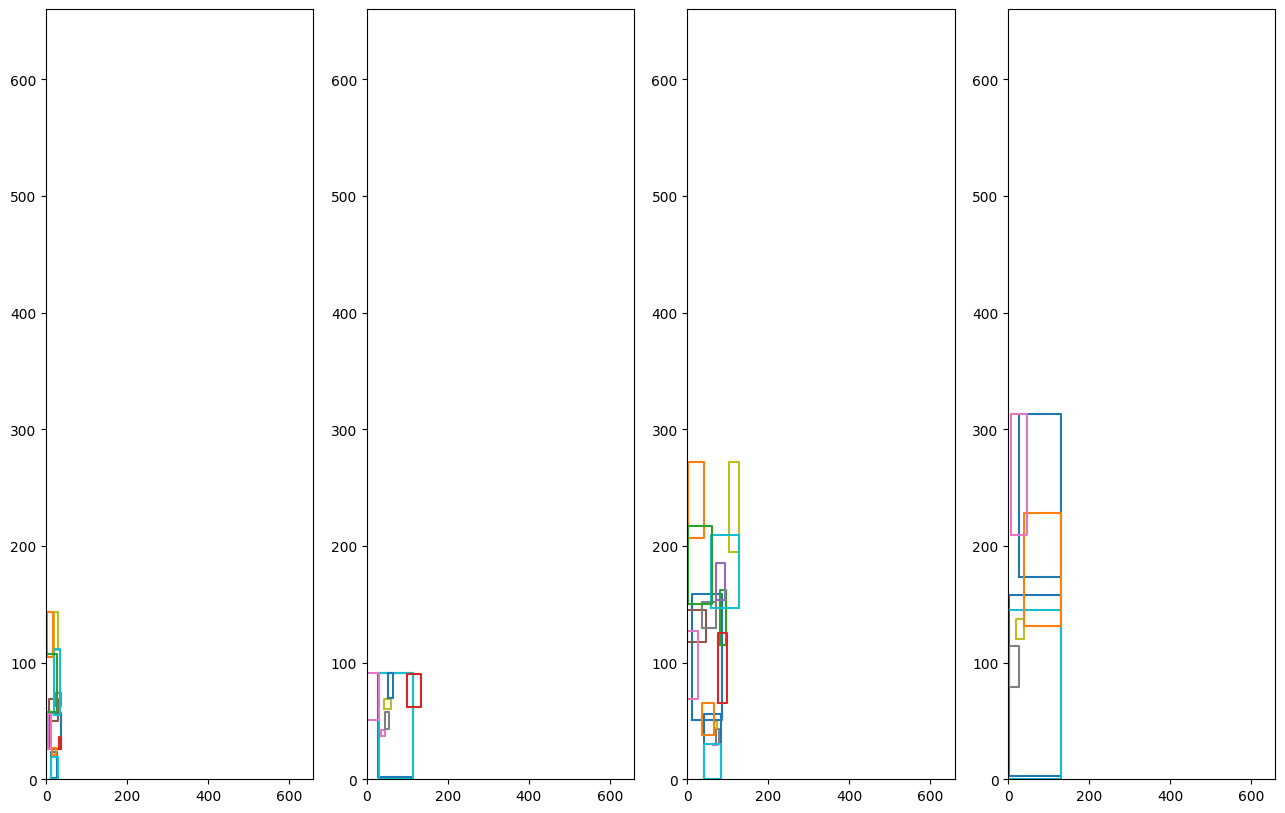

In [22]:
print("Old scaling function")
plot_all_boxes([combine_parts( o_bbx[10], 'cow'),
                combine_parts( o_bbx[100], 'cow'),
                combine_parts(o_bbx[138], 'cow'),
                combine_parts(o_bbx[108], 'cow')])


In [23]:
o_bbx[10]

array([[ 11.,   1.,  28.,  23.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [ 27.,  16.,  27.,  16.],
       [  0.,   0.,   0.,   0.],
       [ 11.,   0.,  30.,  19.],
       [ 10.,  26.,  37.,  57.],
       [ 15.,  21.,  24.,  27.],
       [  0.,   0.,   0.,   0.],
       [ 33.,  26.,  38.,  36.],
       [  0.,   0.,   0.,   0.],
       [  8.,  50.,  29.,  69.],
       [  4.,  26.,  13.,  56.],
       [ 24.,  63.,  38.,  74.],
       [ 19., 111.,  30., 143.],
       [ 20.,  55.,  35., 112.],
       [  0.,   0.,   0.,   0.],
       [  2., 105.,  16., 143.],
       [  0.,  58.,  27., 107.],
       [  0.,   0.,   0.,   0.]], dtype=float32)

Old centering function


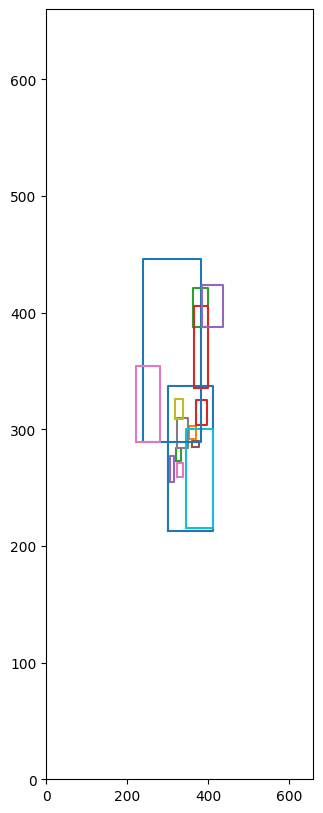

New centering function


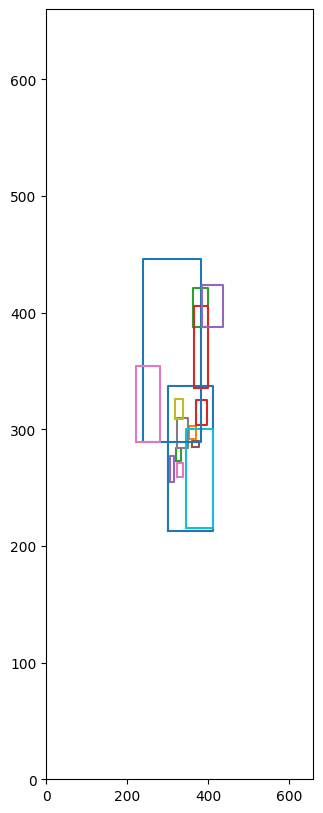

In [25]:
print("Old centering function")
plot_all_boxes([centre_object(o_bbx[80], (canvas_size, canvas_size))])
print("New centering function")
plot_all_boxes([centre_object_old(o_bbx[80], (canvas_size, canvas_size))])


In [ ]:
centre_object(o_bbx[10], (canvas_size, canvas_size)).shape